# Cash flow diagrams 
visually represent income and expenses over some time interval. The diagram consists of a horizontal line with markers at a series of time intervals. At appropriate times, expenses and costs are shown.

Note that it is customary to take cash flows during a year at the end of the year, or EOY (end-of-year). There are certain cash flows for which this is not appropriate and must be handled differently. The most common would be rent, which is normally taken at the beginning of a cash period. There are other pre-paid flows which are handled [similarly](https://global.oup.com/us/companion.websites/9780199339273/student/interactive/ecce/cfd/).


Load all the neccesary libraries

In [133]:
try:
    import numpy as np
    import numpy_financial as npf
    from matplotlib import pyplot as plt
    import pandas as pd
    pd.options.display.max_rows = None
    pd.options.display.max_columns = None
except Exception as e:
    print(e)


### Let's try a scenario
What is the amortization schedule for a 1 year loan of $2500 at 8.24% interest per year compounded monthly?

In [134]:
# loan characteristics
original_balance = 2500
interest = 8.24/100
compounding = 12 #monthly
years = 1
terms = compounding*years #amount of years
# payments
periods = range(1, int(terms+1))
interest_payment = npf.ipmt(interest/compounding, per=periods, nper=terms, pv=-original_balance)
principal_payment = npf.ppmt(interest/compounding, per=periods, nper=terms, pv=-original_balance)

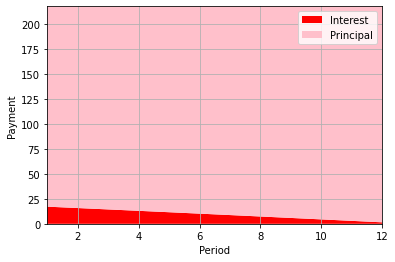

In [135]:
plt.stackplot(periods, 
              interest_payment,
              principal_payment,
              labels=['Interest', 'Principal'],
              colors=['red','pink'], 
              baseline='zero', 
              data=None)
plt.legend(loc='upper right')
plt.xlabel("Period")
plt.ylabel("Payment")
plt.grid("on")
plt.margins(0, 0)

In [136]:
_# pandas float formatting_
pd.options.display.float_format = '{:,.2f}'.format

_# cash flow table_
cf_data = {'Interest': interest_payment, 'Principal': principal_payment}
cf_table = pd.DataFrame(data=cf_data, index=periods)
cf_table['Payment'] = cf_table['Interest'] + cf_table['Principal']
cf_table['Ending Balance'] = original_balance - \
                             cf_table['Principal'].cumsum()
cf_table['Beginning Balance'] = [original_balance] + \
                                list(cf_table['Ending Balance'])[:-1]
cf_table = cf_table[['Beginning Balance', 'Payment', 'Interest', 
                     'Principal', 'Ending Balance']]
cf_table

,Beginning Balance,Payment,Interest,Principal,Ending Balance
1,"2,500.00",217.75,17.17,200.58,"2,299.42"
2,"2,299.42",217.75,15.79,201.96,"2,097.46"
3,"2,097.46",217.75,14.40,203.35,"1,894.11"
4,"1,894.11",217.75,13.01,204.74,"1,689.37"
5,"1,689.37",217.75,11.60,206.15,"1,483.22"
6,"1,483.22",217.75,10.18,207.56,"1,275.66"
7,"1,275.66",217.75,8.76,208.99,"1,066.67"
8,"1,066.67",217.75,7.32,210.42,856.25
9,856.25,217.75,5.88,211.87,644.38
10,644.38,217.75,4.42,213.32,431.05
